### Pyber Analysis
* This data indicates that rural and suburban cities may be slightly underserved by the number of available drivers.  While the number of suburban rides makes up 26.3% of the total rides and rural rides make up 6.8% of the total rides, suburban drivers make up only 16.5% of the total drivers and rural drivers make up only 2.6% of the total drivers.  This may result in longer than necessary waits for customers.  Urban drivers who are near suburban or rural areas should be encouraged to drive in those areas, as they may have better earnings, while resulting in a better customer experience. 
* On average, rural fares are the lowest and urban fares are the highest.  Because of the slightly increased demand, it may be reasonable to increase the rates slightly in rural areas to encourage more drivers to serve those areas.
* The above conclusion is also based on the observation that there are more drivers in areas with higher fares.  Rural and suburban drivers are likely to have to travel farther for less money, so there are fewer drivers.  A slight fare increase in rural and suburban cities may result in a better experience for both users and drivers.

In [17]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
pyber = pd.merge(city, ride, on="city")
# Display the data table for preview
pyber.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [18]:
driver_count = pyber.groupby(["city","type"])['driver_count'].mean()
driver_count_df = pd.DataFrame(driver_count)
driver_count_df = driver_count_df.reset_index()
driver_count_urban = driver_count_df.loc[driver_count_df["type"] == "Urban", :]
driver_count_sub = driver_count_df.loc[driver_count_df["type"] == "Suburban", :]
driver_count_rur = driver_count_df.loc[driver_count_df["type"] == "Rural", :]
avg_fare = pyber.groupby(["city","type"])['fare'].mean()
avg_fare_df = pd.DataFrame(avg_fare)
avg_fare_df = avg_fare_df.reset_index()
avg_fare_urban = avg_fare_df.loc[avg_fare_df["type"] == "Urban", :]
avg_fare_sub = avg_fare_df.loc[avg_fare_df["type"] == "Suburban", :]
avg_fare_rur = avg_fare_df.loc[avg_fare_df["type"] == "Rural", :]
tot_fare = pyber.groupby(["city","type"])['fare'].sum()
ride_count = pyber.groupby(["city","type"])['fare'].count()
ride_count_df = pd.DataFrame(ride_count)
ride_count_df = ride_count_df.reset_index()
ride_count_df.columns = ['city','type','count']
ride_count_urban = ride_count_df.loc[ride_count_df["type"] == "Urban", :]
ride_count_sub = ride_count_df.loc[ride_count_df["type"] == "Suburban", :]
ride_count_rur = ride_count_df.loc[ride_count_df["type"] == "Rural", :]




## Bubble Plot of Ride Sharing Data

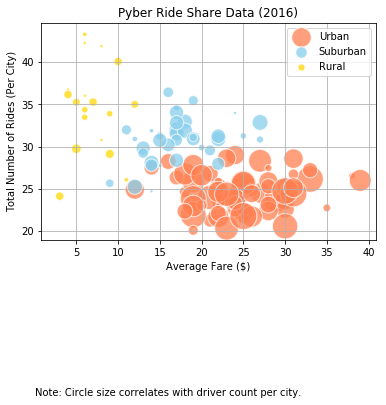

In [19]:
x_axis_urb = ride_count_urban['count']
y_axis_urb = avg_fare_urban['fare']
size_urb = driver_count_urban['driver_count']
plt.scatter(x_axis_urb, y_axis_urb, marker="o", facecolors="coral", edgecolors="white", s=size_urb*10, alpha=0.75, 
            label = "Urban")
x_axis_sub = ride_count_sub['count']
y_axis_sub = avg_fare_sub['fare']
size_sub = driver_count_sub['driver_count']
plt.scatter(x_axis_sub, y_axis_sub, marker="o", facecolors="skyblue", edgecolors="white", s=size_sub*10, alpha=0.75,
           label = "Suburban")
x_axis_rur = ride_count_rur['count']
y_axis_rur = avg_fare_rur['fare']
size_rur = driver_count_rur['driver_count']
plt.scatter(x_axis_rur, y_axis_rur, marker="o", facecolors="gold", edgecolors="white", s=size_rur*10, alpha=0.75,
           label = "Rural")
plt.grid()
plt.legend()
plt.title("Pyber Ride Share Data (2016)")
plt.xlabel("Average Fare ($)")
plt.ylabel("Total Number of Rides (Per City)")
plt.text(0.02, .5, 'Note: Circle size correlates with driver count per city.')
plt.savefig("Pyber_Ride_Share_Data.png")


#### Incorporate a text label regarding circle size outside the upper right corner of the plot

In [6]:
plt.show()

## Total Fares by City Type

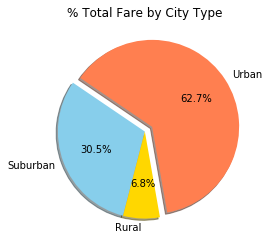

In [20]:
# Calculate Type Percents
tot_fare_type = pyber.groupby("type")['fare'].sum()
tot_fare_df = pd.DataFrame(tot_fare_type)
tot_fare_df = tot_fare_df.reset_index()
# Build Pie Chart
urb_type = tot_fare_df.iloc[2]['fare']
sub_type = tot_fare_df.iloc[1]['fare']
rur_type = tot_fare_df.iloc[0]['fare']

labels_types = ["Urban", "Suburban", "Rural"]
fare_types = [urb_type, sub_type, rur_type]
colors_types = ["coral", "skyblue","gold"]
explode_types = (0.1, 0, 0)
plt.pie(fare_types, explode=explode_types, labels=labels_types, colors=colors_types, autopct="%1.1f%%", 
        shadow=True, startangle=280)
plt.title("% Total Fare by City Type")
# Save Figure
plt.savefig("Pyber_Fare_By_City_Type.png")

In [8]:
# Show Figure
plt.show()

## Total Rides by City Type

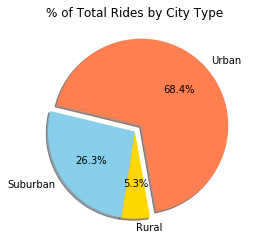

In [21]:
# Calculate Ride Percents
ride_count_type = pyber.groupby("type")['fare'].count()
ride_count_type_df = pd.DataFrame(ride_count_type)
ride_count_type_df = ride_count_type_df.reset_index()
urb_type_count = ride_count_type_df.iloc[2]['fare']
sub_type_count = ride_count_type_df.iloc[1]['fare']
rur_type_count = ride_count_type_df.iloc[0]['fare']

# Build Pie Chart
labels_count = ["Urban", "Suburban", "Rural"]
fare_count = [urb_type_count, sub_type_count, rur_type_count]
colors_count = ["coral", "skyblue","gold"]
explode_count = (0.1, 0, 0)
plt.pie(fare_count, explode=explode_count, labels=labels_count, colors=colors_count, autopct="%1.1f%%", 
        shadow=True, startangle=280)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("Pyber_Rides_By_City_Type.png")


In [10]:
# Show Figure
plt.show()

## Total Drivers by City Type

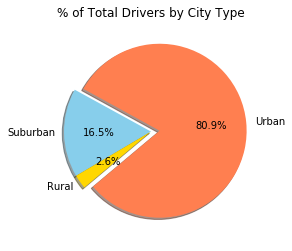

In [23]:
# Calculate Driver Percents
driver_count_df
driver_count_df
driver_count_type = driver_count_df.groupby("type")['driver_count'].sum()
driver_count_type
driver_count_type_df = pd.DataFrame(driver_count_type)
driver_count_type_df = driver_count_type_df.reset_index()
driver_count_type_df
# Build Pie Charts
urb_type_driver = driver_count_type_df.iloc[2]['driver_count']
sub_type_driver = driver_count_type_df.iloc[1]['driver_count']
rur_type_driver = driver_count_type_df.iloc[0]['driver_count']
labels_driver = ["Urban", "Suburban", "Rural"]
driver_count_type = [urb_type_driver, sub_type_driver, rur_type_driver]
colors_driver = ["coral", "skyblue","gold"]
explode_driver = (0.1, 0, 0)
plt.pie(driver_count_type, explode=explode_driver, labels=labels_driver, colors=colors_driver, autopct="%1.1f%%", 
        shadow=True, startangle=220)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("Pyber_Drivers_By_City_Type.png")



In [12]:
# Show Figure
plt.show()